# **MIMIC 3 Download using WFDB Python Package**

---



download the package.


In [1]:
pip install wfdb

     |████████████████████████████████| 143kB 6.6MB/s 


In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd

import wfdb

**Record example**

Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.

Plot the signals, and show the data.

The file '3141595_0001' hosted on PhysioNet https://physionet.org/content/mimic3wdb/31/3141595/.

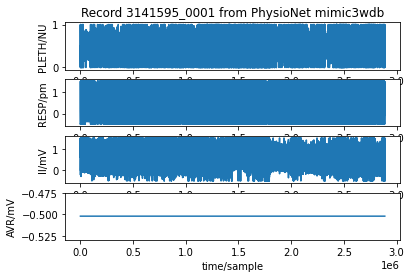

{'adc_gain': [1023.0, 515.0, 510.0, 510.0],
 'adc_res': [10, 10, 10, 10],
 'adc_zero': [512, 512, 512, 512],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 51, 840000),
 'baseline': [0, 254, 256, 256],
 'block_size': [0, 0, 0, 0],
 'byte_offset': [None, None, None, None],
 'checksum': [-12412, 19668, 13968, 0],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'fs': 125,
 'init_value': [470, 0, 565, 0],
 'n_sig': 4,
 'p_signal': array([[ 0.45943304, -0.49320388,  0.60588235, -0.50196078],
        [ 0.45356794, -0.49320388,  0.62941176, -0.50196078],
        [ 0.44965787, -0.49320388,  0.62941176, -0.50196078],
        ...,
        [ 0.79472141,  0.        , -0.50196078, -0.50196078],
        [ 0.79081134,  0.        , -0.50196078, -0.50196078],
        [ 0.78690127,  0. 

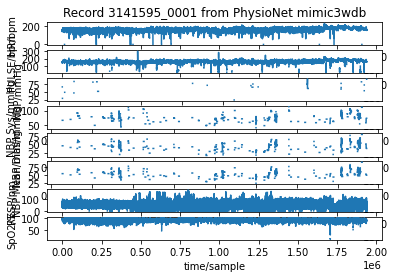

{'adc_gain': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 52),
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None, None, None],
 'checksum': [29726, -25932, 8715, -14954, -26331, -11099, 6171, 29829],
 'comments': ['Location: nicu'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat'],
 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16'],
 'fs': 1,
 'init_value': [142, 145, -32768, -32768, -32768, -32768, 49, 95],
 'n_sig': 8,
 'p_signal': array([[142., 145.,  nan, ...,  nan,  49.,  95.],
        [142., 145.,  nan, ...,  nan,  43.,  95.],
        [143., 145., 

In [3]:
record = wfdb.rdrecord('3141595_0001', pn_dir='mimic3wdb/31/3141595/')
wfdb.plot_wfdb(record=record, title='Record 3141595_0001 from PhysioNet mimic3wdb') 
display(record.__dict__)
record = wfdb.rdrecord('3141595n', pn_dir='mimic3wdb/31/3141595/')
wfdb.plot_wfdb(record=record, title='Record 3141595_0001 from PhysioNet mimic3wdb') 
display(record.__dict__)

Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
which returns a numpy array and a dictionary. Show the data.

**ppg** 2888500 samples = 6 hours, 15 minutes, and 8 seconds, at 125 samples per second. \
**blood pressure** 1938730 samlples = 22 days at 1 sample per second

In [36]:
ppg_signals, ppg_fields = wfdb.rdsamp('3141595_0001', pn_dir='mimic3wdb/31/3141595/', channel_names=['PLETH'])
bp_signals, bp_fields = wfdb.rdsamp('3141595n', pn_dir='mimic3wdb/31/3141595/', channel_names=['NBP Sys','NBP Dias','NBP Mean'])
ppg_signals_df = pd.DataFrame(ppg_signals)
ppg_fields = pd.Series(ppg_fields)
print(ppg_signals_df)
print(ppg_fields)
bp_signals_df = pd.DataFrame(bp_signals)
bp_fields = pd.Series(bp_fields)
print(bp_signals_df)
print(bp_fields)

                0
0        0.459433
1        0.453568
2        0.449658
3        0.444770
4        0.438905
...           ...
2888495  0.801564
2888496  0.797654
2888497  0.794721
2888498  0.790811
2888499  0.786901

[2888500 rows x 1 columns]
fs                       125
sig_len              2888500
n_sig                      1
base_date               None
base_time    10:02:51.840000
units                   [NU]
sig_name             [PLETH]
comments                  []
dtype: object
          0   1   2
0       NaN NaN NaN
1       NaN NaN NaN
2       NaN NaN NaN
3       NaN NaN NaN
4       NaN NaN NaN
...      ..  ..  ..
1938725 NaN NaN NaN
1938726 NaN NaN NaN
1938727 NaN NaN NaN
1938728 NaN NaN NaN
1938729 NaN NaN NaN

[1938730 rows x 3 columns]
fs                                       1
sig_len                            1938730
n_sig                                    3
base_date                             None
base_time                         10:02:52
units                   [mm

filter blood presure nan values.

In [42]:
filtered_array_indices = {}
filtered_array = {} 
for i,field in enumerate(bp_fields['sig_name']):
  filtered_array_indices[field] = np.where(np.isnan(bp_signals[:, i]) == False)
  filtered_array[field] = bp_signals[filtered_array_indices[field], i]
  
display("blood presure filtered data indices:", filtered_array_indices)
display("blood presure filtered data:", filtered_array)

'blood presure filtered data indices:'

{'NBP Dias': (array([  69091,   69092,   69093, ..., 1928031, 1928032, 1928033]),),
 'NBP Mean': (array([  69091,   69092,   69093, ..., 1928031, 1928032, 1928033]),),
 'NBP Sys': (array([  69091,   69092,   69093, ..., 1928031, 1928032, 1928033]),)}

'blood presure filtered data:'

{'NBP Dias': array([[46., 46., 46., ..., 38., 38., 38.]]),
 'NBP Mean': array([[55., 55., 55., ..., 50., 50., 50.]]),
 'NBP Sys': array([[67., 67., 67., ..., 74., 74., 74.]])}